In [1]:
from typing import *
from xai.genome import Genome
from xai.policy import Policy
from xai.asteroids import Asteroids
from xai.bytes import GigaBytes
from xai.asteroids import Asteroids
import matplotlib.pyplot as plt

In [3]:


genome = Genome(
    translate=True,
    rotate=True,
    volatility=1.0,
)

population = genome.populate(10, GigaBytes(10), verbose=True)


Disk used: 0.26/10.00GB: : 10it [00:01,  5.93it/s]


In [4]:
population.evolve(
    generations=10,
    survivors_cnt=1,
    elites_cnt=0,
    roulettes_cnt=90,
    random_cnt=0,
    checkpoints_directory="test",
    number_of_processes=2
)

TypeError: Population.evolve() missing 1 required positional argument: 'rank_cnt'

In [4]:
with population._genome_pool[0] as genome:
    autoencoder = genome.autoencoder

In [5]:
env = Asteroids()
observation, rewards = env.reset()

decode = autoencoder.predict(observation.translated().rotated().tensor(True, "auto"))

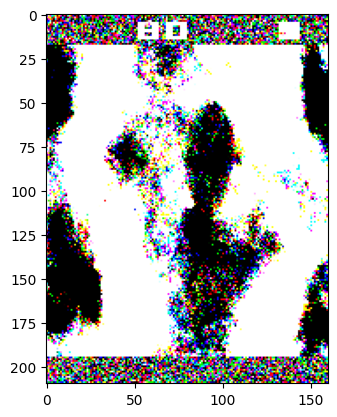

In [6]:
plt.imshow(decode.numpy())